In [1]:
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test5", lin_comp = 0.1, noise=0.5, replicates = 3, independent=False)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test6", lin_comp = 0, noise=0.5, replicates = 3, independent=False)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test7", amplification = -0.04, noise=0.5, replicates = 3, time_step=1,  max_time = 72, independent=False)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test8", amplification = 0.04, noise=0.5, replicates = 3, time_step=1, max_time = 72, independent=False)
df = df.append(df2, ignore_index=True)

In [16]:
#df = file_parser.read_excel("test_data\\data.xlsx", independent=False)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

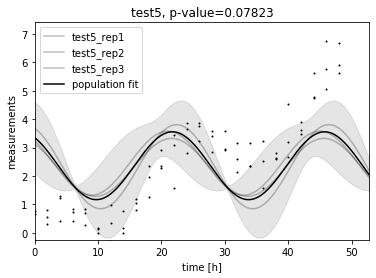

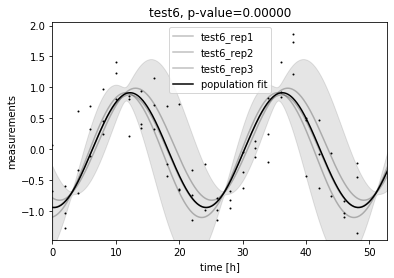

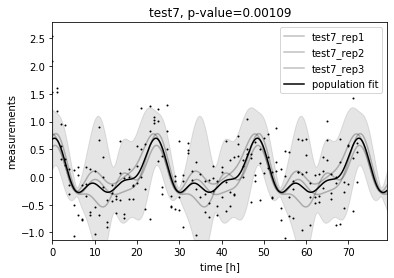

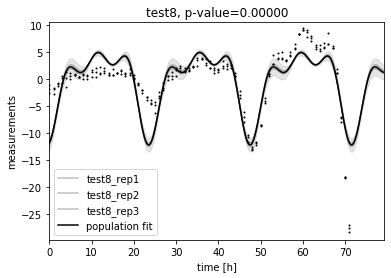

In [11]:
df_results = cosinor.population_fit_group(df, n_components = [1,2,3,4], period=24, plot=False)
df_best_models = cosinor.get_best_models_population(df, df_results, n_components = [1,2,3,4])
cosinor.plot_df_models_population(df, df_best_models)

Obviously, some of these fits could be better by introducing linear component and/or amplification coefficient.

## Generalized population cosinor1 analysis

First, we will use a single-component model. Using these functions, only 1-component models can be used, but richer statistics can be obtained.

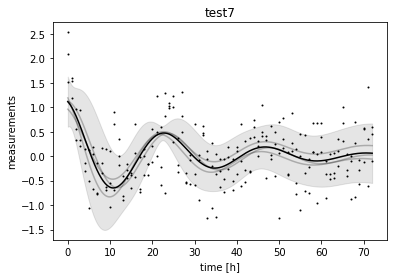

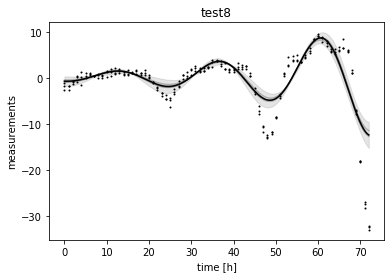

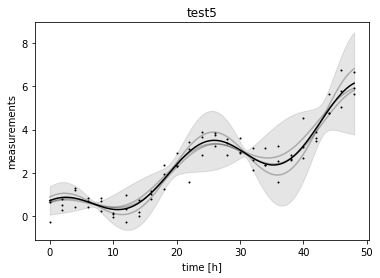

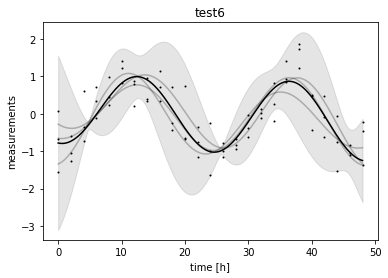

In [161]:
df_results = cosinor_nonlin.population_fit_generalized_cosinor_group(df, period=24, plot=True)

In [162]:
df_results

,test,period,p,q,p_reject,q_reject,amplitude,p(amplitude),q(amplitude),CI(amplitude),...,q(acrophase),CI(acrophase),amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test7,24.0,1.566525e-13,1.566525e-13,0.123985,0.495938,1.075326,0.018516,0.032587,"[0.43685461542897397, 1.713796579130419]",...,0.308653,"[-0.394496943146256, 0.7564818316185007]",-0.039197,0.007794,0.015588,"[-0.05417407170846117, -0.024220201494142668]",-0.000822,0.453901,0.453901,"[-0.0046562950189059146, 0.003013027083685689]"
1,test8,24.0,1.110223e-16,2.220446e-16,1.000000,1.000000,0.823033,0.018426,0.032587,"[0.33557024535074936, 1.3104953031290358]",...,0.000128,"[3.047858851816678, 3.199977013322267]",0.038181,0.004098,0.015588,"[0.027631382120983386, 0.04873003863354673]",0.005319,0.066444,0.132888,"[-0.0008943034035633381, 0.011533250248725977]"
2,test5,24.0,1.110223e-16,2.220446e-16,1.000000,1.000000,0.713946,0.024440,0.032587,"[0.22469986641867395, 1.2031927929157185]",...,0.275718,"[-0.2709808855561434, 0.10850619601344003]",0.013949,0.029476,0.039302,"[0.003410416520073142, 0.024487978168701206]",0.098741,0.000555,0.002221,"[0.08872631462422323, 0.10875491631344553]"
3,test6,24.0,1.443290e-15,1.924387e-15,0.958789,1.000000,0.923478,0.075214,0.075214,"[-0.23249134080753464, 2.0794465721726896]",...,0.006810,"[2.258349625406311, 3.777769167250566]",0.002315,0.853984,0.853984,"[-0.04540660706014321, 0.05003685004185442]",-0.007503,0.171056,0.228075,"[-0.02290592135357489, 0.007899862053120158]"


## Comparison analysis using generalized population cosinor1

The generalised 1-component cosinor model can also be used to compare pairs in a similar way as the basic 1-component model. First we need to define the pairs to compare:

In [88]:
pairs = [("test5", "test6"),("test7", "test8")]

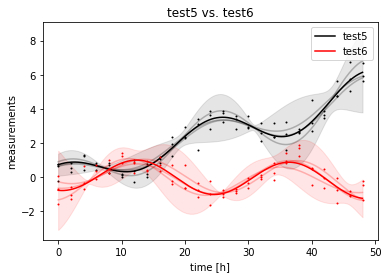

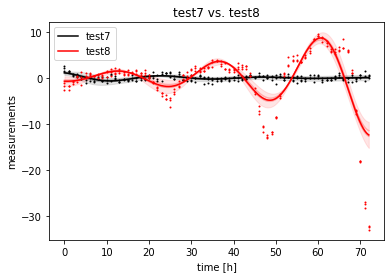

,test,period1,period2,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,p(d_acrophase),q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,0.209531,0.512336,0.512336,"[-0.600458254332218, 1.0195208263629807]",3.099297,0.000070,0.000070,"[2.5940072666682505, 3.60458621553133]",-0.011634,0.363610,0.363610,"[-0.043170248822072405, 0.019902097115009263]",-0.106244,0.000015,0.000031,"[-0.11809894083999543, -0.09438834939812805]"
1,test7 vs. test8,24.0,24.0,-0.252293,0.393407,0.512336,"[-0.9853482589342111, 0.4807626128546034]",2.942925,0.000026,0.000052,"[2.5683405074713765, 3.3175104691953234]",0.077378,0.000211,0.000423,"[0.060660137581353926, 0.09409555637578003]",0.006141,0.022382,0.022382,"[0.001429380152232134, 0.010852834628150732]"


In [89]:
cosinor_nonlin.population_fit_generalized_cosinor_compare_pairs(df, pairs, period1=24, period2=24, plot=True)


## Generalized multicomponent population cosinor analysis
A better fit would be obtained in some cases (e.g., test7 and test8) if a multicomponent cosinor model would be used. 

We can use a wrapper function that automatically identifies the optimal number of components for each dataset, and plots and stores the results in a data frame.

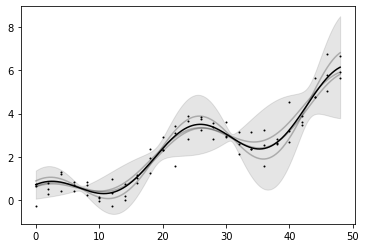

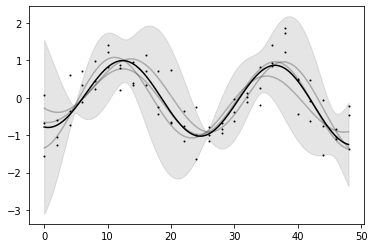

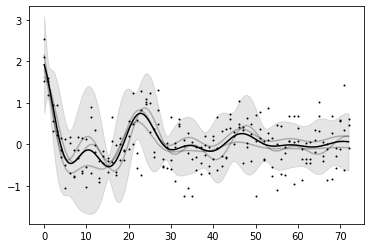

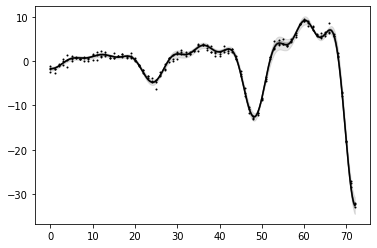

In [113]:
df_best_models = cosinor_nonlin.population_fit_generalized_cosinor_n_comp_group_best(df, period=24, n_components=[1,2,3,4], plot=True)

In [114]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test5,24.0,1.0,1.110223e-16,1.480297e-16,1.000000,1.0,16.283898,0.713945,-0.075474,...,[12.3003003003003],[-0.7056659765919838],0.013949,0.029476,0.058952,"[0.003410416520073142, 0.024487978168701206]",0.098741,0.000555,0.002221,"[0.08872631462422323, 0.10875491631344553]"
1,test6,24.0,1.0,1.443290e-15,1.443290e-15,0.958789,1.0,18.174458,0.923476,3.012658,...,[0.4804804804804805],[-0.7887203881482237],0.002315,0.853984,0.853984,"[-0.04540660706014321, 0.05003685004185442]",-0.007503,0.171056,0.171056,"[-0.02290592135357489, 0.007899862053120158]"
2,test7,24.0,2.0,1.110223e-16,1.480297e-16,1.000000,1.0,54.314383,1.585686,0.232711,...,"[6.486486486486487, 15.567567567567567]","[-0.6383981040562433, -1.1433440260634526]",-0.045359,0.088489,0.117985,"[-0.1076254434666957, 0.016907632408492447]",-0.001495,0.019038,0.038075,"[-0.0023956437277807144, -0.0005946073408823461]"
3,test8,24.0,3.0,1.110223e-16,1.480297e-16,1.000000,1.0,59.398642,1.346996,3.138448,...,[],[],0.039805,0.000180,0.000722,"[0.037503698498922024, 0.04210534386683696]",-0.004042,0.040536,0.054048,"[-0.007653818251053128, -0.0004297292464057012]"


Alternatively, we can also fix the number of components to the same value for all datasets:

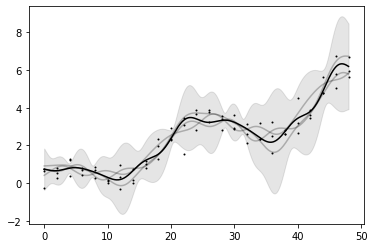

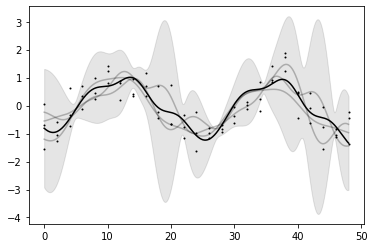

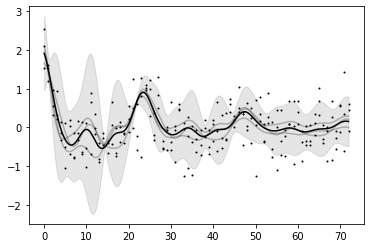

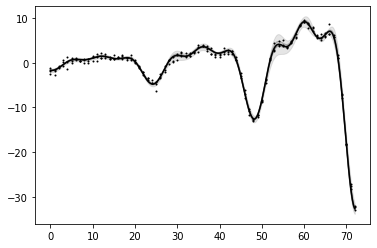

In [120]:
df_4comp_models = cosinor_nonlin.population_fit_generalized_cosinor_n_comp_group(df, period=24, n_components = 4, plot=True)

In [121]:
df_4comp_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test5,24.0,4.0,1.110223e-16,1.480297e-16,NaN,NaN,18.070366,0.864572,0.371079,...,[12.012012012012011],[-0.8376060914901421],0.013816,0.021068,0.040248,"[0.005048474505594643, 0.022584007822800085]",0.099171,0.000921,0.003685,"[0.08620980545373456, 0.11213124449593874]"
1,test6,24.0,4.0,2.471356e-11,2.471356e-11,NaN,NaN,19.240132,1.000876,2.735922,...,[1.3453453453453452],[-0.9451969322553658],0.003868,0.754353,0.754353,"[-0.042568411897028126, 0.050303988556690764]",-0.006986,0.219886,0.219886,"[-0.024032263218958988, 0.01005991827899308]"
2,test7,24.0,4.0,1.110223e-16,1.480297e-16,1.0,NaN,53.368320,1.421153,0.119500,...,"[6.534534534534535, 13.78978978978979]","[-0.5787087400414177, -0.8869782915295977]",-0.033597,0.030186,0.040248,"[-0.059298081032769984, -0.007896136502575285]",-0.001431,0.102715,0.191422,"[-0.003574078054141508, 0.000711192978329243]"
3,test8,24.0,4.0,1.110223e-16,1.480297e-16,1.0,NaN,59.162022,1.346589,-3.119579,...,[0.04804804804804805],[-1.726991418195103],0.039836,0.000101,0.000403,"[0.03811485547020244, 0.0415568199378274]",-0.003292,0.143566,0.191422,"[-0.009329472029700362, 0.00274545253046656]"


## Comparison using generalized multicomponent cosinor analysis
Only the basic analysis is provided here... First, we need to define the pairs to compare:

In [122]:
pairs = [("test5", "test6"),("test7", "test8")]

Then, we can run the analysis. For each measurement, the number of components and period are taken from the `df_best_models` argument. 

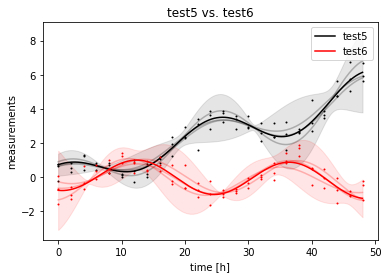

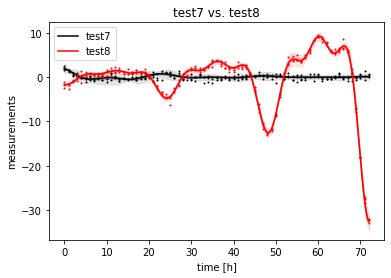

In [143]:
df_compare = cosinor_nonlin.population_compare_pairs_n_comp_group(df, pairs, df_best_models=df_best_models, plot=True)

In [144]:
df_compare

,test,period1,period2,n_components1,n_components2,d_amplitude,d_acrophase,d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,1.0,1.0,0.209531,3.088132,-0.011634,0.363610,0.363610,"[-0.043170248822072405, 0.019902097115009263]",-0.106244,0.000015,0.000031,"[-0.11809894083999543, -0.09438834939812805]"
1,test7 vs. test8,24.0,24.0,2.0,3.0,-0.238690,2.905737,0.085163,0.004178,0.008357,"[0.04495622915998437, 0.12537062426397785]",-0.002547,0.042243,0.042243,"[-0.004948797075059492, -0.00014449935373627657]"


If `df_best_models` is not specified, `n_components` is used for all the fits.

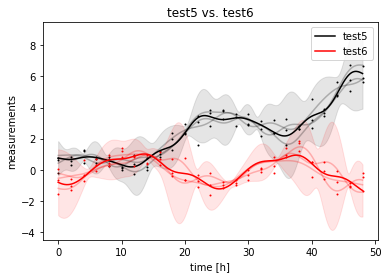

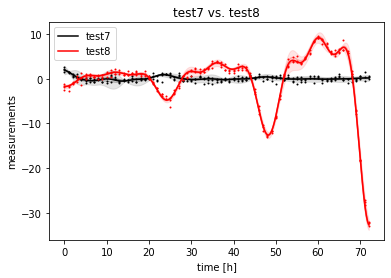

In [159]:
df_compare4 = cosinor_nonlin.population_compare_pairs_n_comp_group(df, pairs, n_components=4, period=24, plot=True)

In [160]:
df_compare4

,test,period1,period2,n_components1,n_components2,d_amplitude,d_acrophase,d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,4.0,4.0,0.136304,2.364843,-0.009948,0.416273,0.416273,"[-0.040442569904889994, 0.020545664236157904]",-0.106157,0.000113,0.000225,"[-0.12569833198675362, -0.08661506290288559]"
1,test7 vs. test8,24.0,24.0,4.0,4.0,-0.074564,3.044106,0.073433,0.000254,0.000507,"[0.05681130792456711, 0.09005458501880799]",-0.001861,0.279574,0.279574,"[-0.005994526500848729, 0.0022733920774271918]"
